In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os


from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold 
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.linear_model import LinearRegression








In [25]:
misdatos=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv', index_col = 0)
misdatos.index.name=None
misdatos  #this will help us visualize the data. A preview
misdatos.describe()



,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [26]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm

LinearRegression()

In [30]:
X = misdatos[['highway-mpg']]
Y = misdatos['price']

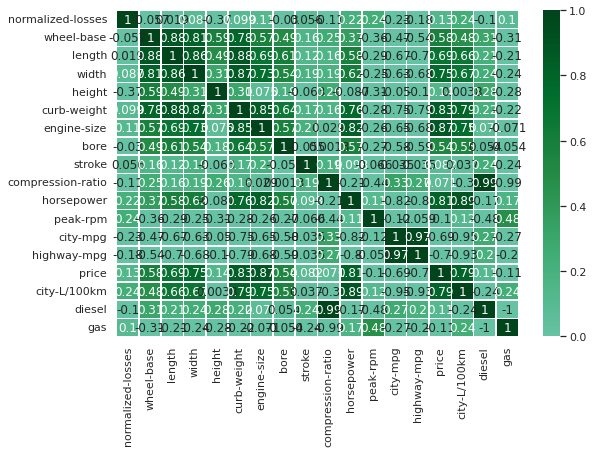

In [31]:
sns.set(rc={'figure.figsize':(9,6)}) 

correlacion =misdatos.corr(method='pearson', min_periods=1)
ax = sns.heatmap(correlacion, cmap="BuGn", vmin=0, vmax=1, center=0, annot=True,linewidths=.5)

plt.show()

In [32]:
lm.fit(X,Y)

LinearRegression()

In [33]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [34]:
lm.intercept_       # la intercección del precio. 38423

38423.3058581574

In [35]:
lm.coef_

array([-821.73337832])

In [36]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [39]:
lm1.fit(misdatos[['engine-size']], misdatos[['price']])
lm1

LinearRegression()

In [40]:
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*misdatos['engine-size']

In [41]:
Z = misdatos[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [43]:
lm.fit(Z, misdatos['price'])

LinearRegression()

In [44]:
lm.fit(Z, misdatos['price'])

LinearRegression()

In [45]:
lm.intercept_

-15806.62462632922

In [47]:
lm2 = LinearRegression()
lm2.fit(misdatos[['normalized-losses' , 'highway-mpg']],misdatos['price'])

LinearRegression()

(0.0, 48188.88257298722)

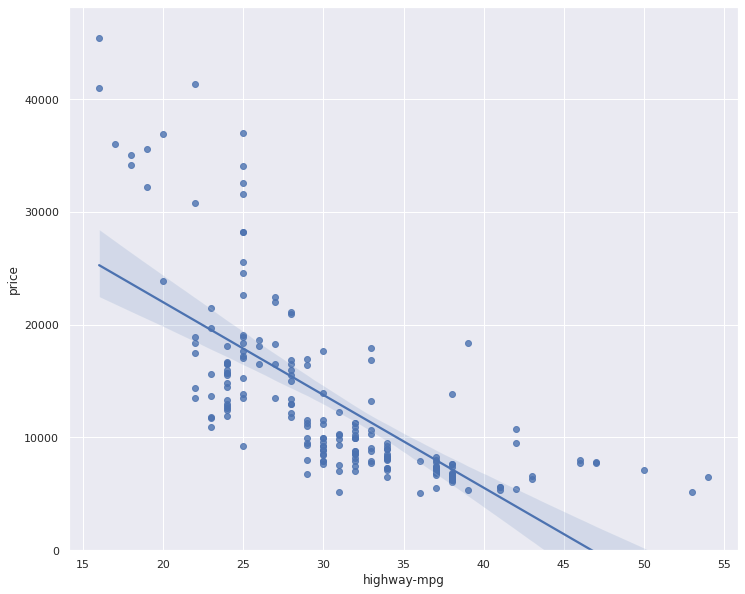

In [48]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

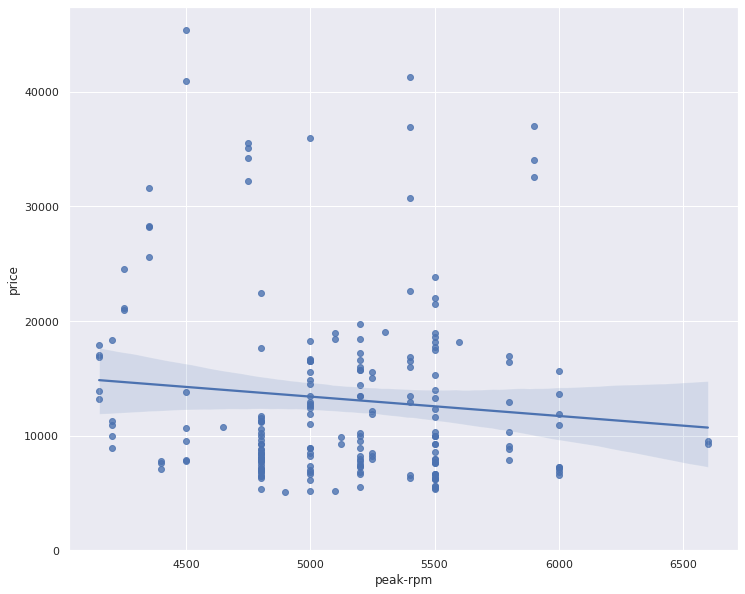

In [50]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=misdatos)
plt.ylim(0,)

In [52]:
misdatos[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


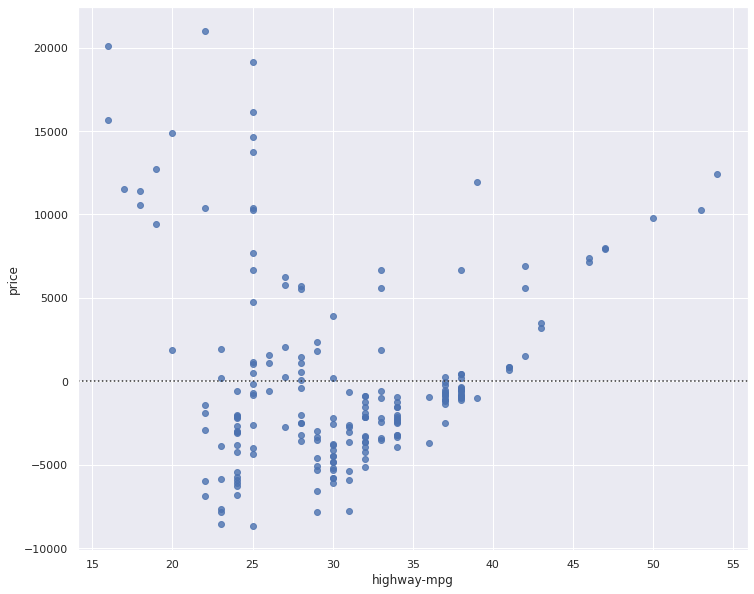

In [54]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=misdatos['highway-mpg'],y=misdatos['price'])
plt.show()

In [56]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


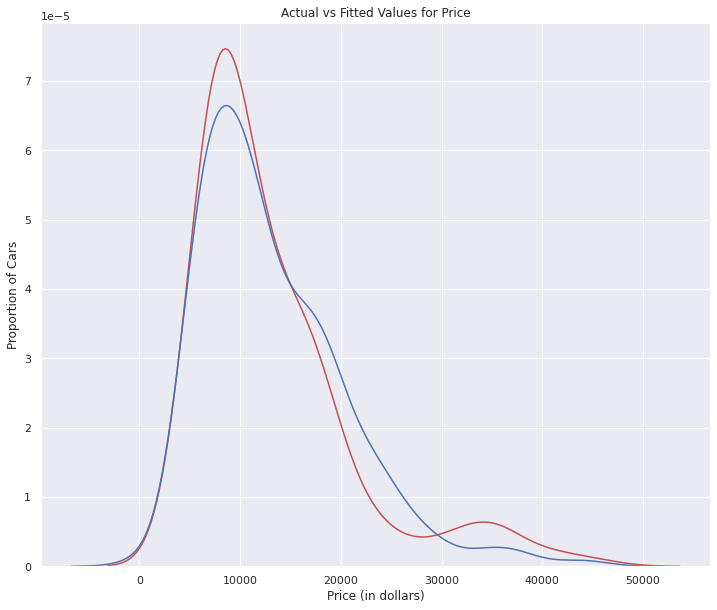

In [58]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(misdatos['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [59]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [60]:
x = misdatos['highway-mpg']
y = misdatos['price']

In [61]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


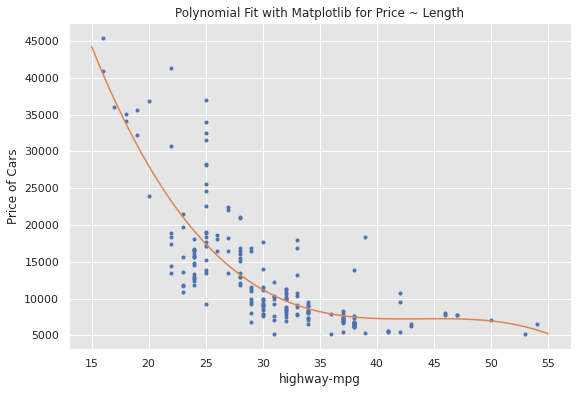

In [62]:
PlotPolly(p, x, y, 'highway-mpg')

In [63]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [64]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [65]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [67]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(misdatos['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [69]:
# fit the model 
lm.fit(Z, misdatos['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, misdatos['price']))

The R-square is:  0.8093562806577457


In [74]:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(misdatos['price'], Y_predict_multifit))


The mean square error of price and predicted value using multifit is:  11980366.87072649


In [72]:
from sklearn.metrics import r2_score

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [75]:
mean_squared_error(misdatos['price'], p(x))

20474146.426361218